# Pretrained Models - Kunskapskontroll

**Obligatoriskt att fylla i uppgifterna nedan.**

Namn: Andreas Wendel

Vem du har presenterat för: Jacob Andresson

Datum då du presenterade: 2024-05-08

**Kunskapskontrollen lämnas in på Omniway.**

**It is possible to load pretrained models which is a powerful concept.**

Model implementation: 
https://keras.io/api/applications/#usage-examples-for-image-classification-models

Class list for ResNet50, for example tennis ball is 852:
https://deeplearning.cms.waikato.ac.nz/user-guide/class-maps/IMAGENET/

In [55]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

In [3]:
model = ResNet50(weights='imagenet')

102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


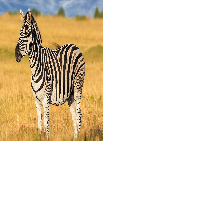

In [56]:
img_path = 'zebra.jpg'
# img_path = 'linjal.jpg'
#img_path = 'tennisboll.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img

In [37]:
x = image.img_to_array(img)
x.shape

(224, 224, 3)

In [39]:
x = np.expand_dims(x, axis=0)
x.shape

(1, 224, 224, 3)

In [41]:
# https://www.tensorflow.org/api_docs/python/tf/keras/applications/resnet50/preprocess_input
x = preprocess_input(x)

In [43]:
preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])
# Predicted: [(u'n02504013', u'Indian_elephant', 0.82658225), (u'n01871265', u'tusker', 0.1122357), (u'n02504458', u'African_elephant', 0.061040461)]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Predicted: [('n02391049', 'zebra', 0.98642665), ('n02423022', 'gazelle', 0.003437722), ('n01798484', 'prairie_chicken', 0.0029412813)]


In [57]:
img_path = 'zebra.jpg'
# img_path = 'linjal.jpg'
#img_path = 'tennisboll.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x.shape
x = preprocess_input(x)

# 1. Take some pictures yourself and predict their class.

In [28]:
def prep_img (path):
    img_path = path
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Predicted: [('n03770679', 'minivan', 0.27834323), ('n02814533', 'beach_wagon', 0.14084819), ('n02974003', 'car_wheel', 0.11836153)]


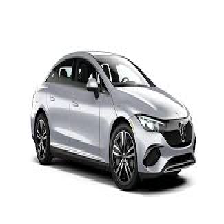

In [74]:
# img_path = 'zebra.jpg'
# img_path = 'linjal.jpg'
# img_path = 'tennisboll.jpg'
# img_path = 'car.jpg'
# img_path = 'flygplan.jpg'
# img_path = 'häst.jpg'

bild = prep_img("car.jpg")
preds = model.predict(bild)
print('Predicted:', decode_predictions(preds, top=3)[0])
show_img = image.load_img("car.jpg", target_size=(224, 224))
show_img
#häst get 99% sorrel?
#car bilden är skalad dålig så den ser typ ut som en minivän

# 2. Answer the question: Why is "Pretrained models" a very powerful concept?

Pretrained models är modeller som redan är tränade på ett stort dataset under en lång tid som kan ge bra resultat. 
Tack vare transfer learning så kan vi använda oss av dessa Pretrained models för att anpassa den förtränade modellen till våran modell/probelm utan att behöva börja om från början. Dem redan skapade neurala patterns och features av den tränaden modellen kan användas igen och anpassa för ens egna modell och medföra bättre resultat. Speciellt om man själv har ett mindre dataset.

Dessutom genom att använda sig av pretrained modelles så kan vi minska den tränings tid samt inte behöva lika mycket data.

Ex om en förtränad modell kan identifiera fordon så som bilar, motorcyklar flygplan med hög accuracy så kan vi använda denna modellen och jobba vidare med den för att t.ex träna modellen för att identifiera bil modeller.